## Problem Statement

In the telecom industry, customer retention is a crucial challenge faced by companies, including our client. The goal is to predict customer churn in a more accurate and automated manner. This real-life problem requires identifying factors that contribute to customer churn and developing techniques to analyze and predict if a telecom customer is likely to churn or not. By effectively predicting churn, telecom companies can take proactive measures to retain customers, improve satisfaction, and optimize business performance

## Data Definition

1. **State** - Represents the state in which the telecom customer resides
2. **Account Lenght** - Indicates the length of duration of the customer's account with the telecom company
3. **Area Code** - Refers to the area code associated with the customer's telephone number
4. **International plan** - Indicates whether the customer has an international calling plan 
5. **Voice mail plan** - Specifies whether the customer has subscribed to a voicemail service
6. **Number vmail messages** - Represents the number of voicemail messages the customer has received
7. **Total day minutes** - Refers to the total number of minutes the customer has used for daytime calls
8. **Total day calls** - Represents the total number of calls made by the customer during the day
9. **Total day charge** - Represents the total charge incurred by the customer for daytime calls
10. **Total eve minutes** - Indicates the total number of minutes the customer has used for evening calls
11. **Total eve calls** - Represents the total number of calls made by the customer during the evening
12. **Total eve charge** - Represents the total charge incurred by the customer for evening calls
13. **Total night minutes** - Indicates the total number of minutes the customer has used for nighttime calls
14. **Total night calls** - Represents the total number of calls made by the customer during the night
15. **Total night charge** - Represents the total charge incurred by the customer for nighttime calls
16. **Total intl minutes** - Indicates the total number of minutes the customer has used for international calls.
17. **Total intl calls** - Represents the total number of international calls made by the customer.
18. **Total intl charge** - Represents the total charge incurred by the customer for international calls.
19. **Customer service calls** - Represents the number of customer service calls made by the customer.
20. **Churn**- Indicates whether the customer has churned or not, typically represented by binary values such as 1 for churned and 0 for not churned.

## Importing all the necessary libraries

In [102]:
import warnings
warnings.filterwarnings("ignore")


# basic libraries
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# dependence between categorical data
from scipy.stats import chi2_contingency 

# multi collinearinty between columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spliting data, cross validation and grid search
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# preprocessing and scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

# stats model
import statsmodels.api as sm

# ML libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# balancing the classes in data
from imblearn.over_sampling import SMOTE

# sequential forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
# plot the performace of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [103]:
# import data 
df = pd.read_csv('Telecom_churn.csv')
df2 = df.copy()

In [104]:
# read top 5 rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [105]:
# read bottom 5 rows
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3332,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [106]:
# check shape
df.shape

(3333, 20)

In [107]:
# basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

        The dataset has 19 independent variables out of which 16 are numerical and 3 are categorical
        Churn is our target variable

In [108]:
# ckeck count of unique values in the data
for column in df.columns:
    unique_values = len(df[column].unique())
    print("Number of Unique values in %s : %d"%(column,unique_values))

Number of Unique values in State : 51
Number of Unique values in Account length : 212
Number of Unique values in Area code : 3
Number of Unique values in International plan : 2
Number of Unique values in Voice mail plan : 2
Number of Unique values in Number vmail messages : 46
Number of Unique values in Total day minutes : 1667
Number of Unique values in Total day calls : 119
Number of Unique values in Total day charge : 1667
Number of Unique values in Total eve minutes : 1611
Number of Unique values in Total eve calls : 123
Number of Unique values in Total eve charge : 1440
Number of Unique values in Total night minutes : 1591
Number of Unique values in Total night calls : 120
Number of Unique values in Total night charge : 933
Number of Unique values in Total intl minutes : 162
Number of Unique values in Total intl calls : 21
Number of Unique values in Total intl charge : 162
Number of Unique values in Customer service calls : 10
Number of Unique values in Churn : 2


            All the features are on different scales, hence nomalization tecniques have to be applied on the features to bring balance. 

### Statistical Summary

In [109]:
# numerical columns
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


    There are outliers as we can see a few features with have max value more than the 3rd quartiile.

In [110]:
# for categorical columns
df.describe (include = 'object')

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


<AxesSubplot:xlabel='Churn', ylabel='count'>

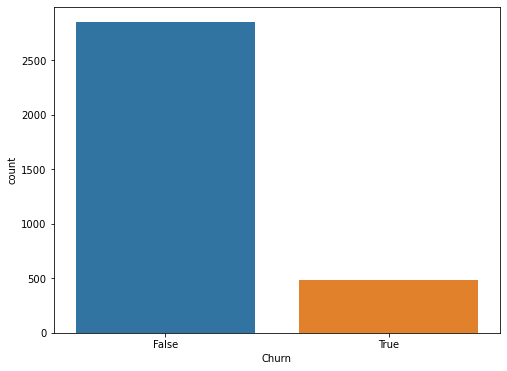

In [111]:
# check the count of the target using the plot
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot( data = df , x = 'Churn', ax=ax)

imblance between the classes is observed, going forward will use class balancing technique to check if it imporves the model performace

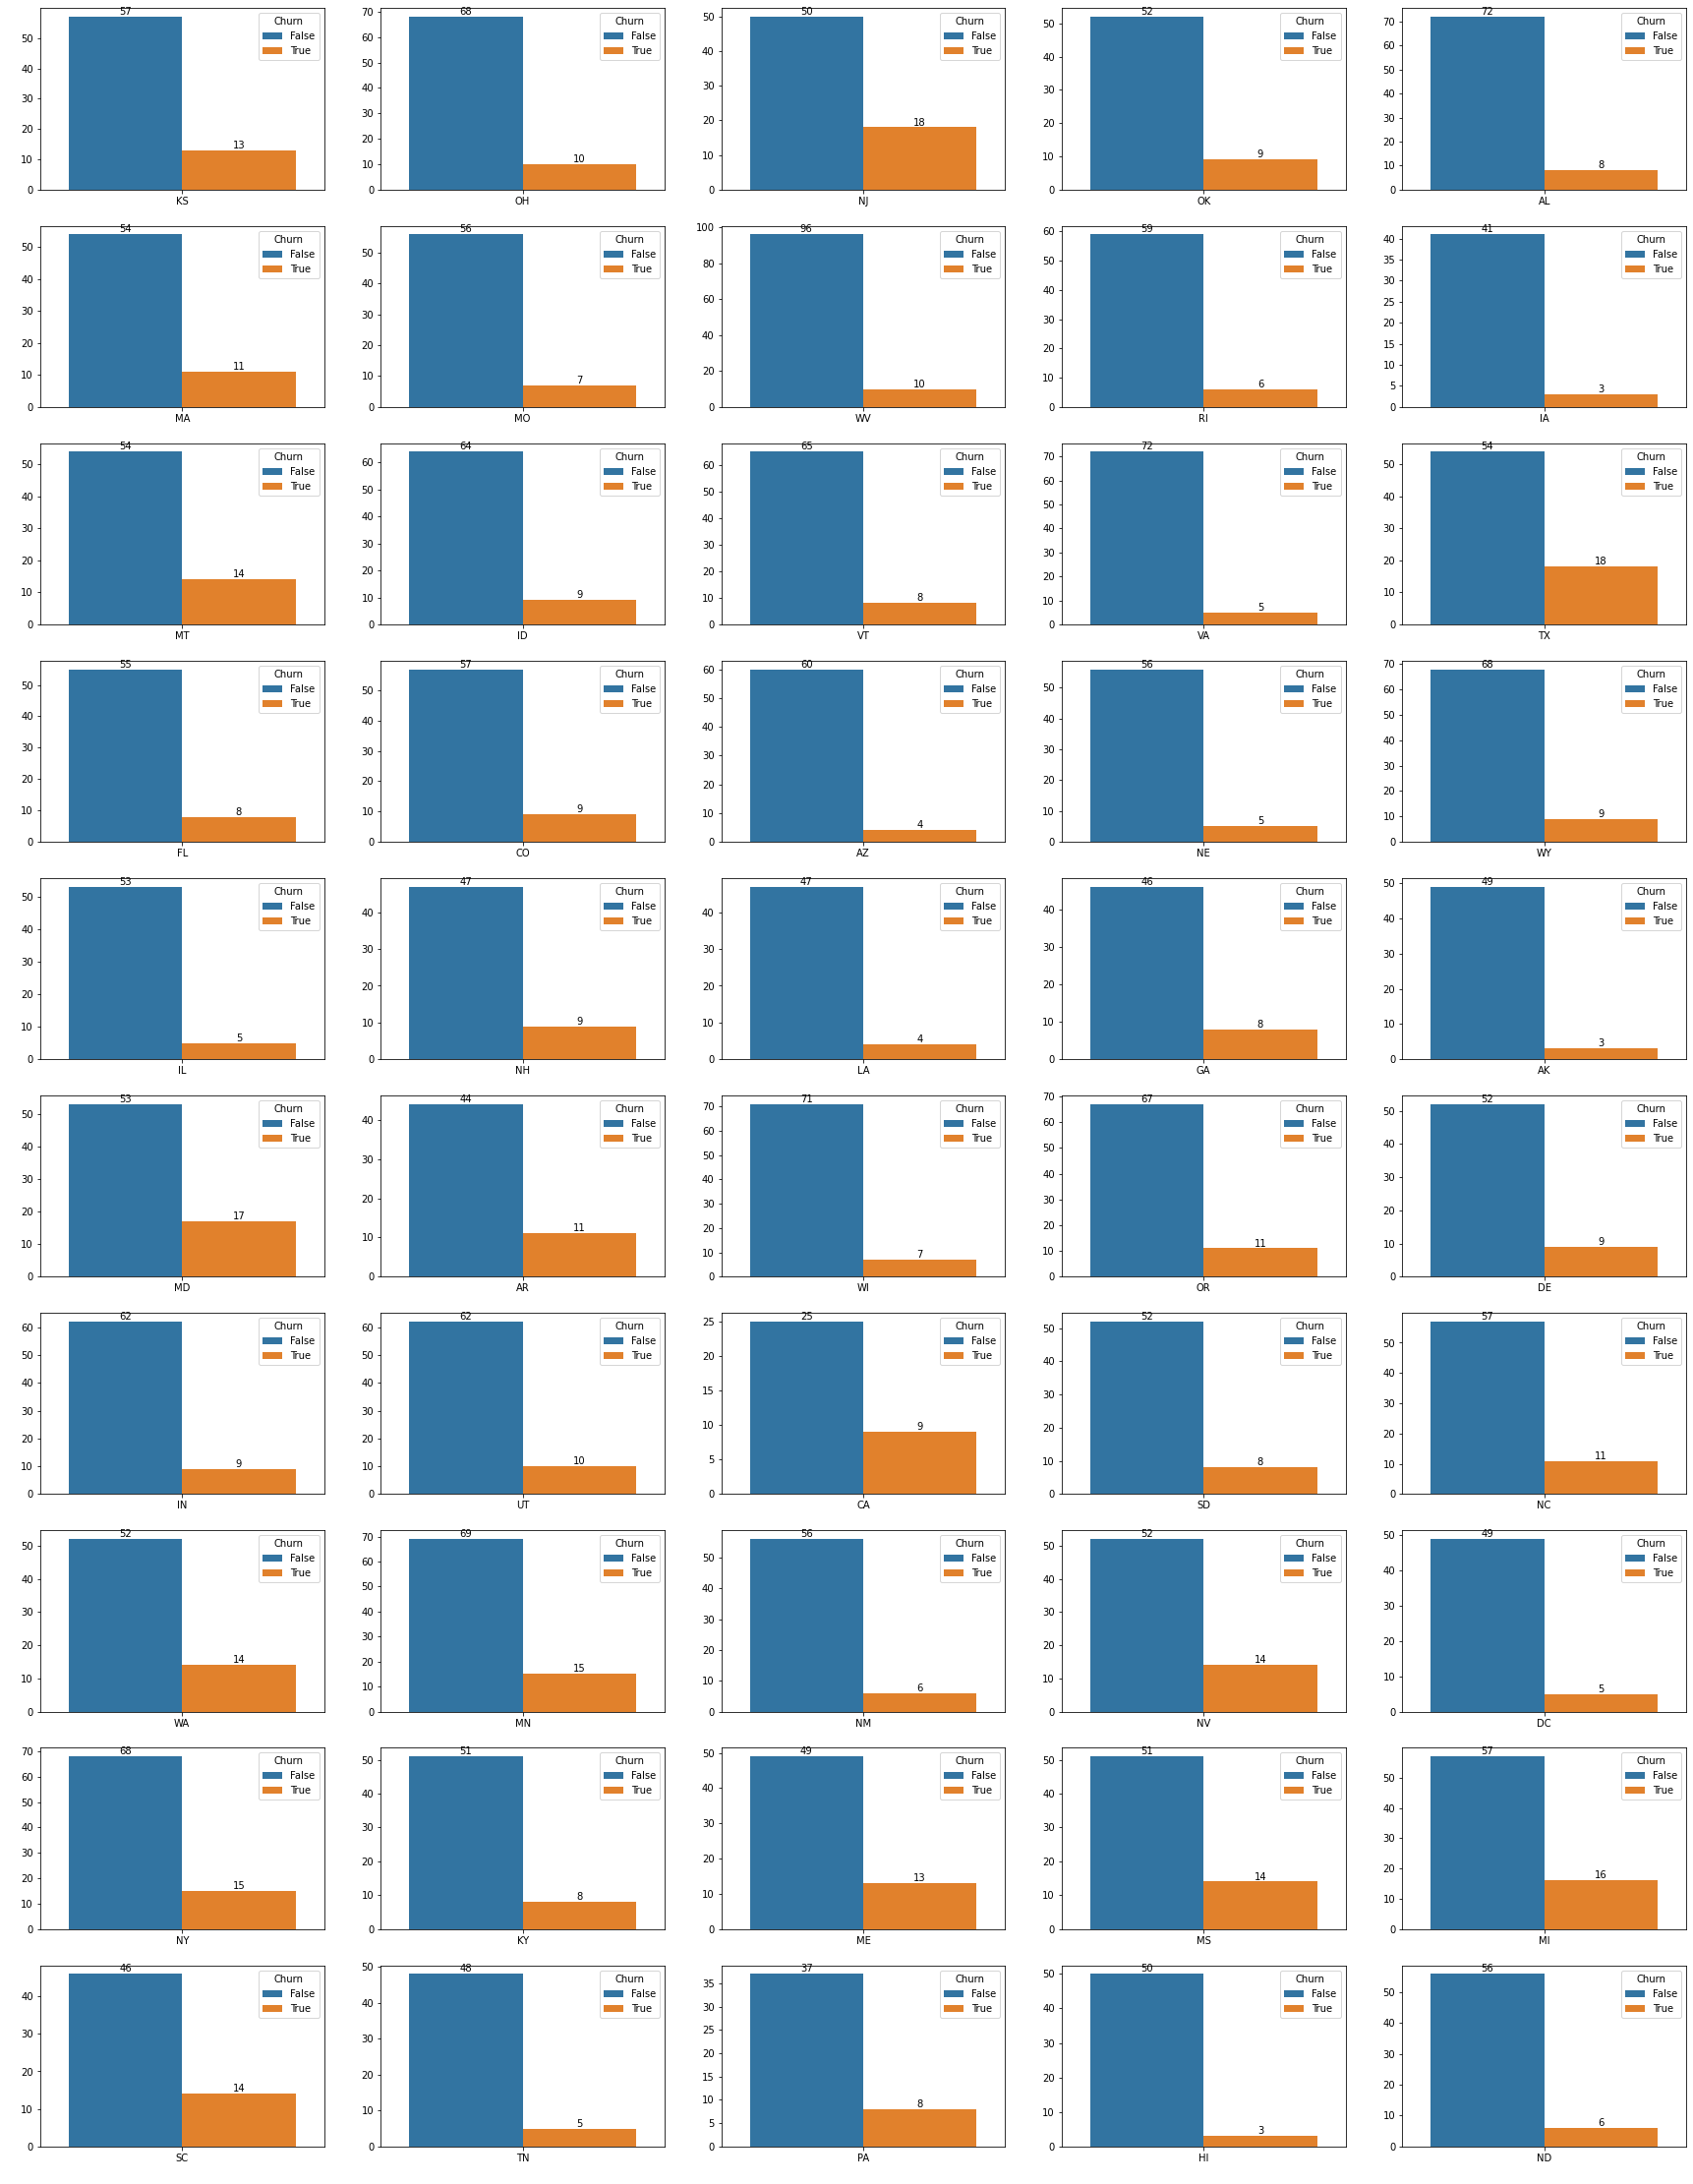

In [112]:
# Check if there is any effect of states on churn

# specifing for grid with 10 rows and 5 coulumns and figure size for the overall figuresize
fig, ax = plt.subplots( 10, 5, figsize = (30,40)) 
for i in range(len(df.State.unique())-1):
    state_data  = df[df.State == df.State.unique()[i]]
    sns.countplot(data = state_data, x = "State", hue = "Churn", ax = ax[i//5,i%5])
    ax[i//5,i%5].bar_label(ax[i//5,i%5].containers[1])
    ax[i//5,i%5].bar_label(ax[i//5,i%5].containers[0])
    ax[i//5,i%5].set_ylabel(" ")
    ax[i//5,i%5].set_xlabel(" ")

Since States influence the churn rate that information should be included in the data if the target is dependent on the states.
To more sure about the dependence of the variable States we must we must conduct a chi squares test to ckeck teh effect of categorical variable on another categoricall variable

Null Hypothesis (H0) : The two vaiables are indepedent ( there is no association between them )

Alternate Hypothesis (H1) : The two vaiables are not indepedent ( there is association between them )

The chi-square test of independence determines whether there is a significant association between two categorical variables by comparing observed and expected frequencies.

## Conducting Chi Squared Test of Independence to Check for Dependence between State and Churn

https://www.jmp.com/en_in/statistics-knowledge-portal/chi-square-test/chi-square-test-of-independence.html

In [113]:
# creating a cross tab of the variables state and churn to see the churns and not churned customers per state
states_churn = pd.crosstab(df['State'],df['Churn'], rownames = ['State'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(states_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  0.002296221552011188
State and Churn are Dependent


In [114]:
# calculate proportion of churn per state 
states_churn["Proportion"] = ((states_churn.iloc[:,1]/states_churn.iloc[:,0])* 100).round()

# categorize the state as per the churn rate
# proportion less than 10%
less_than_10 = list(states_churn[states_churn['Proportion'] <= 10].index) 

# proportion between 10-20%
more_than_10 = list(states_churn[(states_churn['Proportion'] > 10) & (states_churn['Proportion'] <= 20 )].index)

# proportion more than 20%
more_than_20 = list(states_churn[states_churn['Proportion'] > 20].index)

# replacing the name of states with ranking as per the conditions
df['State'].replace(less_than_10,0, inplace = True)
df['State'].replace(more_than_10,1, inplace = True)
df['State'].replace(more_than_20,2, inplace = True)

Using the crosstab found the proportion on churned customers state wise and categorized them into 3 categores as per the rate of churn. 

Used iloc for the Propotion column and index for the columns (state names in pivot) and put them in a list 

Replaced the names of states as per the groups created.

## Plot between state and churn and check if the states effect

<AxesSubplot:xlabel='State', ylabel='count'>

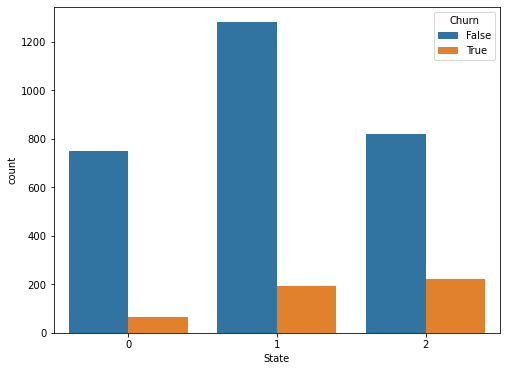

In [115]:
# check count plot of churn as per the categorized states 
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot( data = df, x = "State", hue = "Churn")

## Check for dependence bewteen state and churn 

In [116]:
# creating a cross tab of the variables state and churn to see the churns and not churned customers per state
states_churn = pd.crosstab(df['State'],df['Churn'], rownames = ['State'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(states_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  5.3092339568446585e-16
State and Churn are Dependent


## Plot between international plans and churn and check if the international plans effect

<AxesSubplot:xlabel='International plan', ylabel='count'>

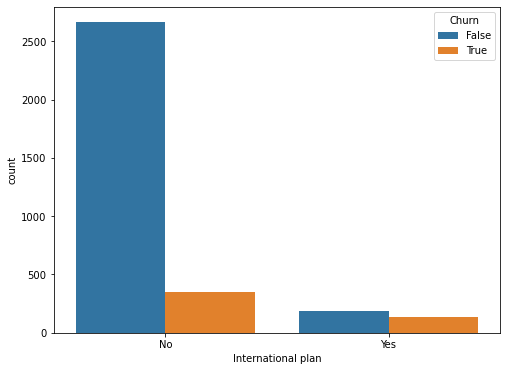

In [117]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data = df, x = "International plan", hue = "Churn")

We cans ee that most of the customers who opted for international plans have churned

## Check for dependence between Internatinal Plan and Churn 

In [118]:
# creating a cross tab of the variables international plan and churn to see the churns and not churned customers per state
Ip_churn = pd.crosstab(df['International plan'],df['Churn'], rownames = ['International plan'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(Ip_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  2.4931077033159556e-50
State and Churn are Dependent


## Plots between voice mail and churn and see if it affects churn

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

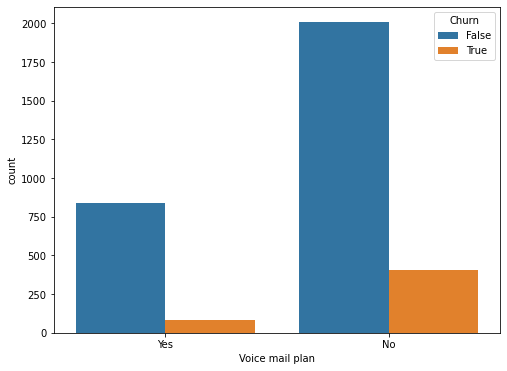

In [119]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot( data = df, x ="Voice mail plan", hue ="Churn")

## Check for dependence between voice mail plan and churn

In [120]:
# creating a cross tab of the variables international plan and churn to see the churns and not churned customers per state
Vmp_churn = pd.crosstab(df['Voice mail plan'],df['Churn'], rownames = ['Voice mail plan'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(Vmp_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  5.15063965903898e-09
State and Churn are Dependent


## Plots between Customer Service and churn and see if it affects churn

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

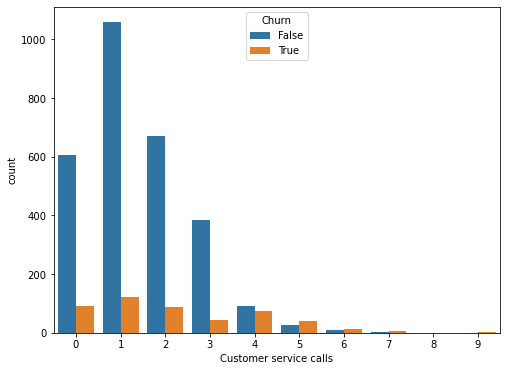

In [121]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot( data = df, x ="Customer service calls", hue ="Churn")

##  Check for dependence between customer service calls and churn 

In [122]:
# creating a cross tab of the variables international plan and churn to see the churns and not churned customers per state
Csc_churn = pd.crosstab(df['Customer service calls'],df['Churn'], rownames = ['Customer service calls'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(Csc_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  2.243376519451563e-68
State and Churn are Dependent


We have many unique number of customer service calls , we can replace them and convert it to binary classification which helps us get the insight even better

In [123]:
# replacing calls greater than or equal to 4 to 1 and less than 4 to 0
df["Customer service calls"]  = np.where(df['Customer service calls'] >= 4,1,0)

##  Check for dependence between replaces customer service calls and churn 

In [124]:
# creating a cross tab of the variables international plan and churn to see the churns and not churned customers per state
Csc_churn = pd.crosstab(df['Customer service calls'],df['Churn'], rownames = ['Customer service calls'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(Csc_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  9.773228376848311e-72
State and Churn are Dependent


## Plots between Customer Service and churn and see if it affects churn

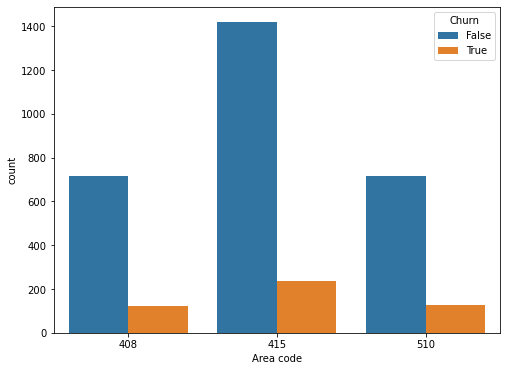

In [125]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data = df, x = "Area code", hue = "Churn")

##  Check for dependence between Area code and churn 

In [126]:
# creating a cross tab of the variables international plan and churn to see the churns and not churned customers per state
Ac_churn = pd.crosstab(df['Area code'],df['Churn'], rownames = ['Area code'], colnames = ['Churn'])

# input the table in chi squared test of indepence function to obtain the p value
stat, p, dof, expected = chi2_contingency(Ac_churn)

# print p-value
print("p-value: ", p)

# compare p value with significance 
if p > 0.05 :
    print("State and Churn are Independent")
else :
     print("State and Churn are Dependent")

p-value:  0.9150556960243712
State and Churn are Independent


We can see that the area is not playing a significant role in churn

## Check for theoutliers of numerical columns

In [127]:
# Seperating numerical columns
num_cols = ["Account length",
    "Number vmail messages",
    'Total day minutes',
    'Total day calls',
    'Total day charge',
    'Total eve minutes',
    'Total eve calls',
    'Total eve charge',
    'Total night minutes',
    'Total night calls',
    'Total night charge',
    'Total intl minutes',
    'Total intl calls',
    'Total intl charge']

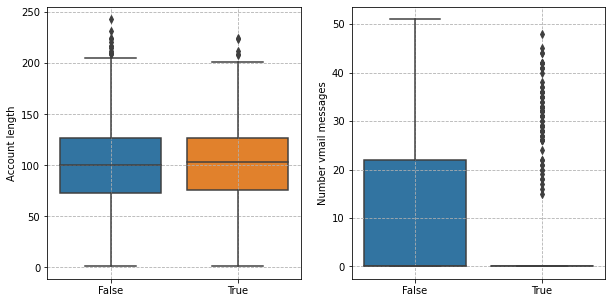

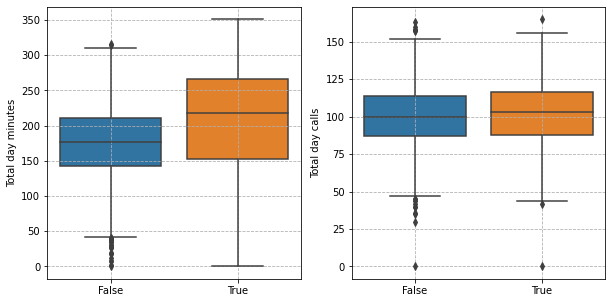

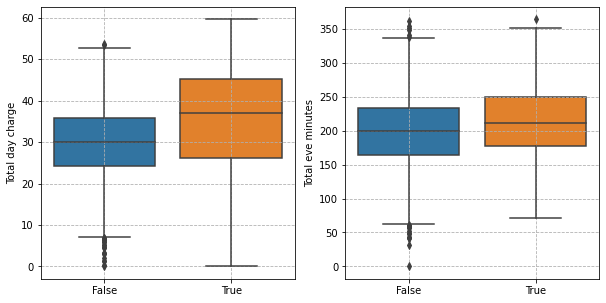

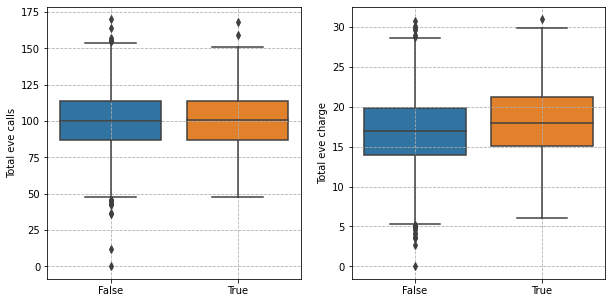

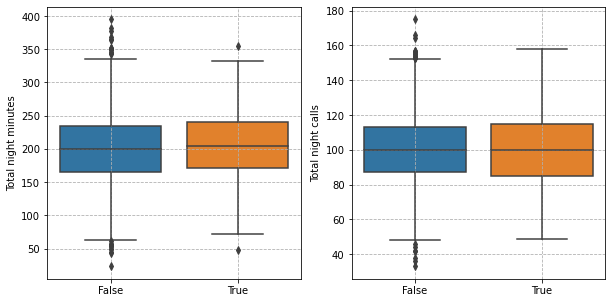

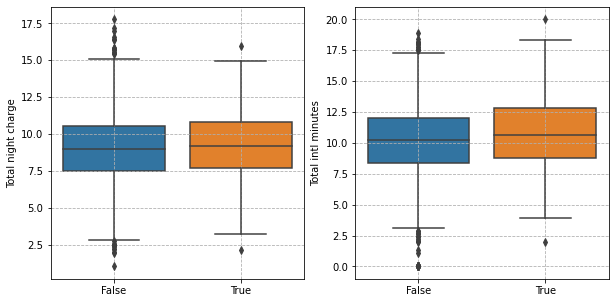

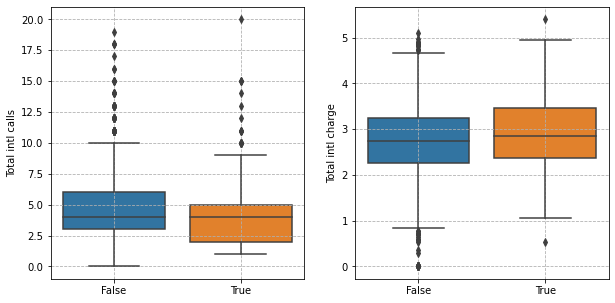

In [128]:
# plotting box plots to see if there are outliers with respect to churn

for i in range(0, len(num_cols), 2):
    fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
    sns.boxplot(data=df, y=num_cols[i], x="Churn", ax=ax[0])
    sns.boxplot(data=df, y=num_cols[i+1], x="Churn", ax=ax[1])
    for axis in ax:
        axis.grid(True, which='both', linestyle='--')
        axis.set(xlabel='')

From the above box plots we can observe that there are outliers that should be checked, churners on an average have slightly higher values in every feature total international calls and account length which may make a bit of sense, since higher charge and expenditure might push customers to churn

## Check the distribution of the numerical columns

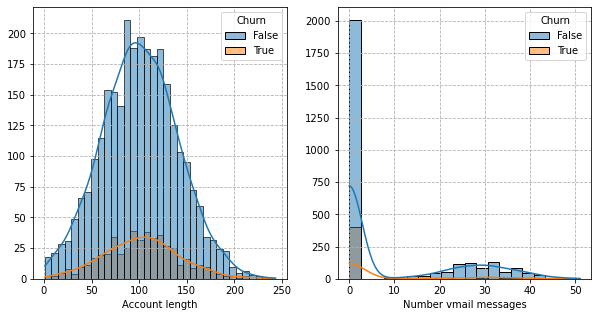

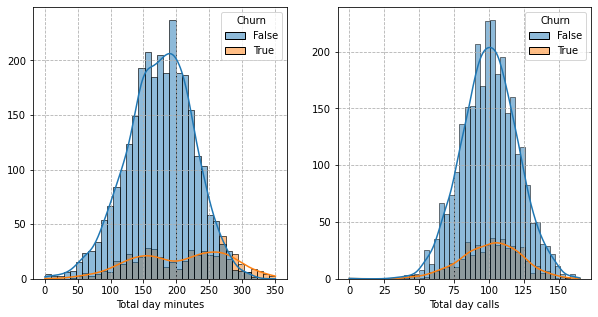

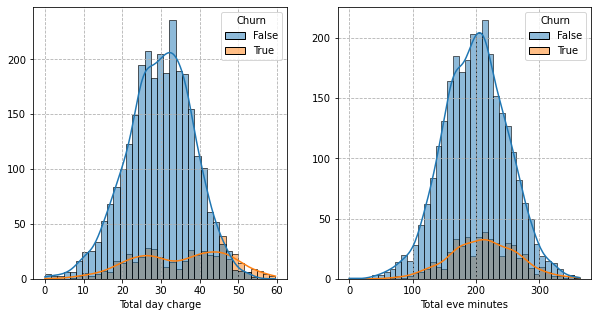

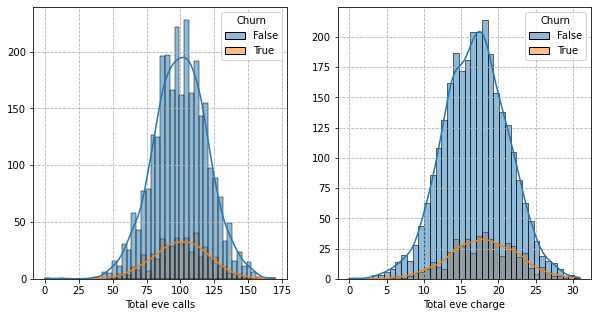

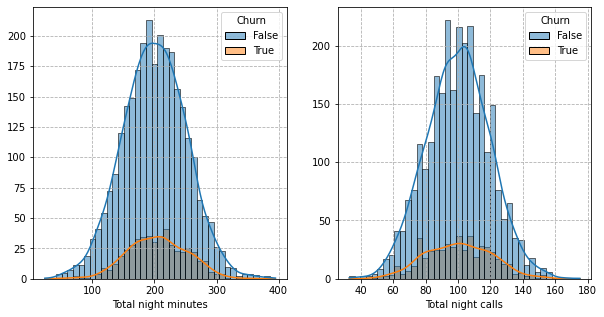

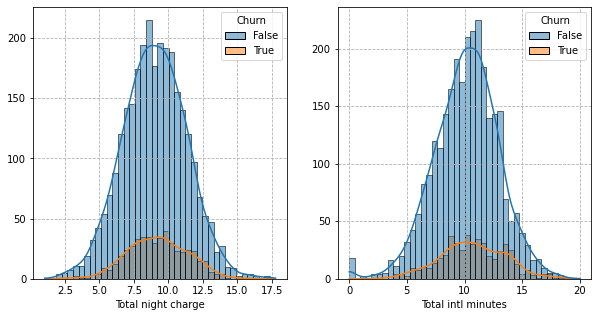

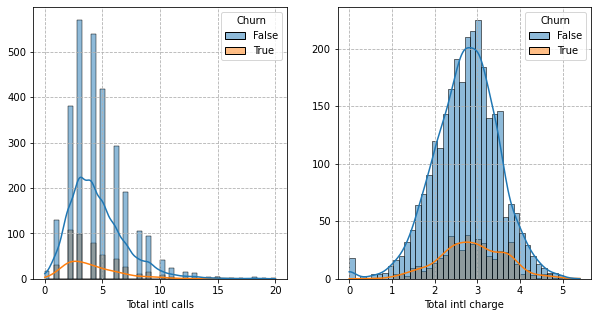

In [129]:
for i in range(0,len(num_cols),2):
    fig, ax = plt.subplots(1, 2,  figsize=(10, 5))
    sns.histplot(df,x = num_cols[i], hue = "Churn", kde = True,ax=ax[0])
    sns.histplot(df,x = num_cols[i+1], hue = "Churn", kde = True,ax=ax[1])
    for ax in ax:
        ax.grid(True, which='both', linestyle='--')
        ax.set(ylabel='')

From the above distribution plot we cannot clearly observe outliers

In [130]:
# defining a function to return a set of all outliers in the individual feature
def Out_Z_Score(data):
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i - mean) / std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return set(outliers)

In [131]:
# check and return outliers in each cnumerical column
for col in num_cols:
    print(f"Outliers in {col} are :", Out_Z_Score(df[col]))

Outliers in Account length are : {224, 225, 232, 243, 221}
Outliers in Number vmail messages are : {50, 51}
Outliers in Total day minutes are : {0.0, 2.6, 7.9, 7.8, 12.5, 345.3, 346.8, 350.8}
Outliers in Total day calls are : {0, 163, 36, 165, 35, 40, 30}
Outliers in Total day charge are : {0.0, 1.34, 2.13, 0.44, 58.7, 1.33, 58.96, 59.64}
Outliers in Total eve minutes are : {0.0, 354.2, 361.8, 42.2, 43.9, 42.5, 363.7, 48.1, 31.2}
Outliers in Total eve calls are : {0, 164, 36, 37, 168, 170, 12}
Outliers in Total eve charge are : {0.0, 2.65, 3.73, 3.61, 3.59, 4.09, 30.75, 30.91, 30.11}
Outliers in Total night minutes are : {354.9, 43.7, 364.3, 45.0, 395.0, 364.9, 47.4, 367.7, 23.2, 377.5, 381.9}
Outliers in Total night calls are : {33, 164, 36, 38, 166, 175}
Outliers in Total night charge are : {1.97, 2.03, 2.13, 1.04, 15.97, 16.39, 17.19, 16.99, 17.77, 16.42, 16.55}
Outliers in Total intl minutes are : {0.0, 1.3, 1.1, 18.9, 20.0}
Outliers in Total intl calls are : {12, 13, 14, 15, 16, 1

the outliers don't seem to be effecting the data hence we are keeping them

## Check for correlation

<AxesSubplot:>

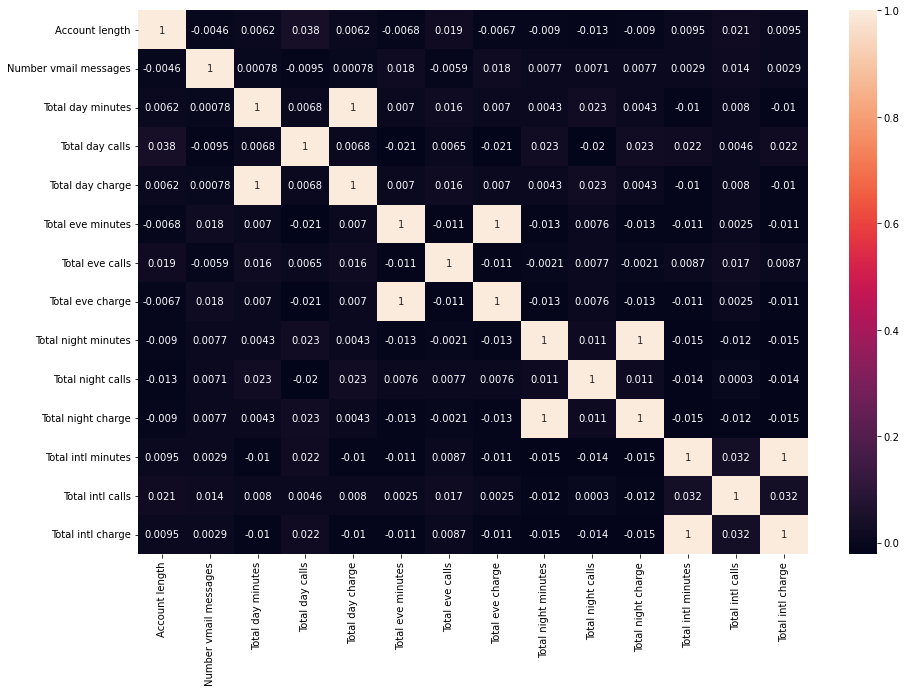

In [132]:
# plotting presons correration coefficient heatmap

plt.figure(figsize = (15,10))
sns.heatmap( df[ num_cols ].corr(), annot = True)

Correlation between multiple columns can be observed, to remove correalation we drop the correlated columns

<AxesSubplot:>

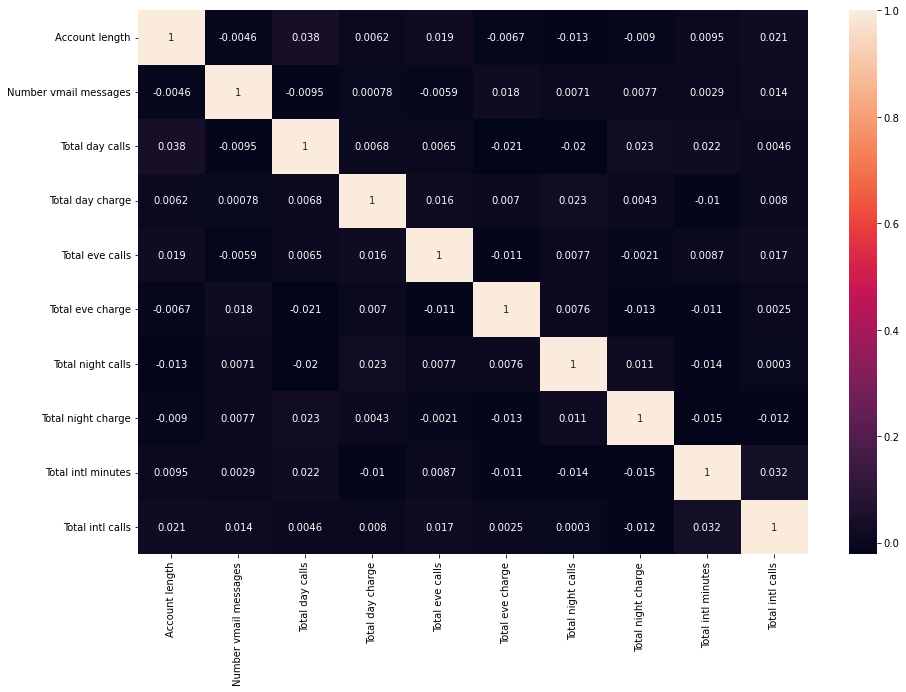

In [133]:
# choosing the columns to be dropped 
to_drop = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl charge']

# plot heap map of correlation after dropping the corerlated columns
plt.figure(figsize = (15,10))
sns.heatmap(df[num_cols].drop(to_drop, axis = 1).corr(), annot = True)

Now the correlation has been removed

In [134]:
# split the dependent and independent variables
X = df.drop(['Churn'], axis = 1)
y = df[['Churn']]

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# check shape of the data after split
print("X_train: ",X_train.shape,"y_train: ",y_train.shape,"\nX_test: ",X_test.shape,"y_test: ",y_test.shape)

X_train:  (2666, 19) y_train:  (2666, 1) 
X_test:  (667, 19) y_test:  (667, 1)


In [135]:
# defing a functrio to merge features and return
def merge_features(to_merge,to_drop) :
    
    to_merge["Total number of minutes"] = to_merge["Total day minutes"] + to_merge["Total eve minutes"] + to_merge["Total night minutes"]

    to_merge["Total minutes per call"] = (to_merge["Total number of minutes"]) / (to_merge["Total day calls"] + to_merge["Total eve calls"] + to_merge["Total night calls"])

    to_merge["Average charge per call"] = (to_merge["Total day charge"] + to_merge["Total eve charge"] + to_merge["Total night charge"]) / (to_merge["Total number of minutes"])

    to_merge["International usage rate"] = (to_merge["Total intl minutes"]) / (to_merge["Total number of minutes"])

    return to_merge.drop(to_drop, axis = 1)

# merging columns in train and test data
x_train = merge_features(X_train, to_drop)
x_test = merge_features(X_test, to_drop)

In [136]:
# selectng features to be encoded
cat_col = ['State',"Area code","International plan","Voice mail plan"] 
num = ["Account length","Number vmail messages",'Total day calls','Total day charge','Total eve calls','Total eve charge',
    'Total night calls','Total night charge','Total intl minutes','Total intl calls',"Total number of minutes",
       "Total minutes per call","Average charge per call","International usage rate",'Customer service calls']

# selecting dataframes to be encoded as per the columns mentioned
numerical_tr  = x_train[num]    
cat_tr  = x_train[cat_col]    

numerical_te  = x_test[num]    
cat_te  = x_test[cat_col]    

ohe = OneHotEncoder(drop = 'first') # initialize one hot encoder
df_oh_col_tr = pd.DataFrame(ohe.fit_transform(cat_tr).toarray(), columns = ohe.get_feature_names_out()) # encoding and creating a dataframe
    
# create a data frame of all the encoded data
X_traint = pd.concat([numerical_tr, df_oh_col_tr.reset_index(inplace=True, drop=True)], axis = 1)

# replacing label with 0 and 1
y_train.replace([False,True],[0,1], inplace = True)

# scaling and ecoding test data

df_oh_col_te = pd.DataFrame(ohe.transform(cat_te).toarray(), columns = ohe.get_feature_names_out()) # encoding and creating a dataframe
    
# create a data frame of all the encoded data
X_testt = pd.concat([numerical_te, df_oh_col_te.reset_index(inplace=True, drop=True)], axis = 1)
    
# replacing label with 0 and 1
y_train.replace([False,True],[0,1], inplace = True)

In [137]:
# check shape of the data after split
print("X_train_transformed: ",X_traint.shape,"y_train_transformed: ",y_train.shape,"\nX_test_transformed: ",X_testt.shape,"y_test_transformed: ",y_test.shape)

X_train_transformed:  (2666, 15) y_train_transformed:  (2666, 1) 
X_test_transformed:  (667, 15) y_test_transformed:  (667, 1)


# Using Stats Model 

In [138]:
# define X and y
X_train_sm1 = sm.add_constant(X_traint)
X_test_sm1 = sm.add_constant(X_testt)

# instantiate stats model , fit data and get summary
stats_model1 = sm.Logit(y_train,X_train_sm1)
results1 = stats_model1.fit()
results1.summary()

Optimization terminated successfully.
         Current function value: 0.318063
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2650
Method:                           MLE   Df Model:                           15
Date:                Sat, 01 Jul 2023   Pseudo R-squ.:                  0.2358
Time:                        11:55:56   Log-Likelihood:                -847.96
converged:                       True   LL-Null:                       -1109.6
Covariance Type:            nonrobust   LLR p-value:                6.496e-102
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       30.9384      5.528      5.597      0.000      20.104      41.773
Account length               0.0019      0.002      1.210      0.226      -0.001       0.005
Number vmail messages       -0.0273      0.005     -5.087      0.000      -0.038      -0.017
Total day calls              0.0022      0.009      0.255      0.798      -0.015       0.019
Total day charge            -2.8755      5.014     -0.574      0.566     -12.702       6.951
Total eve calls             -0.0030      0.009     -0.336      0.737      -0.020       0.014
Total eve charge            -6.5655     10.030     -0.655      0.513     -26.224      13.093
Total night calls            0.0007      0.009      0.083      0.934      -0.016       0.018
Total night charge         -13.1744     18.948     -0.695      0.487     -50.312      23.963
Total intl minutes          -0.2798      0.105     -2.657      0.008      -0.486      -0.073
Total intl calls            -0.0846      0.028     -3.010      0.003      -0.140      -0.029
Total number of minutes      0.5642      0.852      0.662      0.508      -1.107       2.235
Total minutes per call      -0.2181      1.164     -0.187      0.851      -2.500       2.064
Average charge per call   -440.8720     46.606     -9.460      0.000    -532.218    -349.525
International usage rate   230.2494     61.595      3.738      0.000     109.525     350.974
Customer service calls       2.5329      0.173     14.640      0.000       2.194       2.872
============================================================================================
"""

    We cans see that the columns 
    Account length, Total day calls, Total day charge, Total eve calls, Total eve charge, 
    Total night calls, Total night charge, Total number of minutes, Total minutes per call 
    do dot have significant impact on the Likelihood of Churn

In [139]:
# check the model performance on test data using AUROC
predicted_probs1 = results1.predict(X_test_sm1)

predicted_probs1

auroc = roc_auc_score(y_test, predicted_probs1)
print("AUROC:", auroc)

AUROC: 0.8151249484845079


In [140]:
# define columns to drop

drop_col = ['Account length', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge','Total night calls', 'Total night charge','Total number of minutes', 'Total minutes per call']

# define X and y
X_train_sm2 = sm.add_constant(X_traint.drop(columns = drop_col))                             
X_test_sm2 = sm.add_constant(X_testt.drop(columns = drop_col))

# instantiate stats model , fit data and get summary
stats_model2 = sm.Logit(y_train,X_train_sm2)
results2 = stats_model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.355997
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2666
Model:                          Logit   Df Residuals:                     2659
Method:                           MLE   Df Model:                            6
Date:                Sat, 01 Jul 2023   Pseudo R-squ.:                  0.1447
Time:                        11:55:56   Log-Likelihood:                -949.09
converged:                       True   LL-Null:                       -1109.6
Covariance Type:            nonrobust   LLR p-value:                 2.487e-66
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -6.0366      0.793     -7.611      0.000      -7.591      -4.482
Number vmail messages       -0.0246      0.005     -4.846      0.000      -0.035      -0.015
Total intl minutes           0.3795      0.044      8.568      0.000       0.293       0.466
Total intl calls            -0.0746      0.027     -2.813      0.005      -0.127      -0.023
Average charge per call     36.2425      7.452      4.864      0.000      21.637      50.848
International usage rate  -171.9763     23.204     -7.411      0.000    -217.456    -126.496
Customer service calls       2.2738      0.162     14.053      0.000       1.957       2.591
============================================================================================
"""

In [141]:
# check the model performance on test data using AUROC
predicted_probs2 = results2.predict(X_test_sm2)

predicted_probs2

auroc = roc_auc_score(y_test, predicted_probs2)
print("AUROC:", auroc)

AUROC: 0.7892922708028923


    Even thought the AUROC is less for the second stats model 
    The Coefficients have more significant impact on likelihood of churn
    As see for the minimum Likelihood Value the second model has the less Likelihood value which shows the second model is a better fit

# Using Sklearn

In [142]:
# check the count of unique values in train and test label
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts-y-train:", class_counts)

unique, counts = np.unique(y_test, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts-y-test:", class_counts)

Class counts-y-train: {0: 2276, 1: 390}
Class counts-y-test: {False: 574, True: 93}


We can clearly see that the data set is imbalaced

## Apply SMOTE to Balance classes

In [143]:
# using smote technique to balance the classes in train data
smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_traint,y_train)

#Check the shape of data after applying SMOTE
print("X_train_SMOTE: ",X_smote.shape,"y_train_SMOTE: ",y_smote.shape)

# check the count of unique values in train and test label
unique, counts = np.unique(y_smote, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts-y_smote:", class_counts)

X_train_SMOTE:  (4552, 15) y_train_SMOTE:  (4552, 1)
Class counts-y_smote: {0: 2276, 1: 2276}


In [144]:
# fit data in logistic rergession 

lr = LogisticRegression()
lr_model = lr.fit(X_smote,y_smote)


# prediction
train_pred_lr = lr_model.predict(X_smote)
test_pred_lr = lr_model.predict(X_testt)

In [145]:
# defing a function for model evaluation
def evaluation(y,t):
    tn, fp, fn, tp = confusion_matrix(y,t).ravel()

    print('Accuracy',accuracy_score(y,t))
    print('Confusion Matrix\n',confusion_matrix(y,t))
    print('roc_auc_score', roc_auc_score(y,t))

    print("\nPrecision-PPV-positive", tp/(tp+fp))
    print("Sensitivity-TPR-recall-positive", tp/(tp+fn))
    print("Fall Out-FPR", fp/(tn+fp))

    Recall_positive = tp/(tp+fn)
    Precision_positive = tp/(tp+fp)
    print("\nF1-Score-positive", (2*Precision_positive*Recall_positive)/(Precision_positive+Recall_positive))
    
    print("\nPrecision-NPV-negative", tn/(tn+fn))
    print("Specificity/Selectivity TNR-recall-negative", tn/(tn+fp))
    print("Miss Rate - FNR", fn/(tp+fn))

    Recall_negative = tn/(tn+fn)
    Precision_negative = tn/(tn+fp)
    print("\nF1-Score-positive", (2*Precision_negative*Recall_negative)/(Precision_negative+Recall_negative)) 

### Evaluating model performance

In [146]:
# Train performance

evaluation(y_smote,train_pred_lr)

Accuracy 0.6386203866432337
Confusion Matrix
 [[1375  901]
 [ 744 1532]]
roc_auc_score 0.6386203866432338

Precision-PPV-positive 0.6296752979860255
Sensitivity-TPR-recall-positive 0.6731107205623902
Fall Out-FPR 0.3958699472759227

F1-Score-positive 0.6506689318326608

Precision-NPV-negative 0.6488909863142992
Specificity/Selectivity TNR-recall-negative 0.6041300527240774
Miss Rate - FNR 0.3268892794376098

F1-Score-positive 0.6257110352673494


In [147]:
# test performance

evaluation(y_test,test_pred_lr)

Accuracy 0.6131934032983508
Confusion Matrix
 [[352 222]
 [ 36  57]]
roc_auc_score 0.6130718219624594

Precision-PPV-positive 0.20430107526881722
Sensitivity-TPR-recall-positive 0.6129032258064516
Fall Out-FPR 0.3867595818815331

F1-Score-positive 0.3064516129032258

Precision-NPV-negative 0.9072164948453608
Specificity/Selectivity TNR-recall-negative 0.6132404181184669
Miss Rate - FNR 0.3870967741935484

F1-Score-positive 0.7318087318087317


### Applying SFS forward selection algorithm for finding best features

In [148]:
# get feature names
feature_names = X_smote.columns

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(estimator=LogisticRegression(), k_features='best', forward=True, scoring='roc_auc',cv=5)

# Perform feature selection
sfs.fit(X_smote, y_smote)

# Get the selected feature indices
selected_feature_indices = sfs.k_feature_idx_

# Get the selected feature names
selected_feature_names = [feature_names[i] for i in selected_feature_indices]

# Transform the training and testing data to keep only the selected features
X_train_selected = sfs.transform(X_smote)
X_test_selected = sfs.transform(X_testt)

# Print the selected features and the model score
print("Selected Features:", selected_feature_names)

Selected Features: ['Account length', 'Number vmail messages', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total minutes per call', 'Average charge per call', 'International usage rate', 'Customer service calls']


## Using the best selected features to fit Logistic Regression

In [149]:
# fit logistic regression with selected features
lr_model = lr.fit(X_train_selected,y_smote)


# prediction
train_pred_lr = lr_model.predict(X_train_selected)
test_pred_lr = lr_model.predict(X_test_selected)

In [150]:
# train performance after selecting best features

evaluation(y_smote,train_pred_lr)

Accuracy 0.7003514938488576
Confusion Matrix
 [[1615  661]
 [ 703 1573]]
roc_auc_score 0.7003514938488576

Precision-PPV-positive 0.7041181736794987
Sensitivity-TPR-recall-positive 0.6911247803163445
Fall Out-FPR 0.29042179261862916

F1-Score-positive 0.6975609756097562

Precision-NPV-negative 0.6967213114754098
Specificity/Selectivity TNR-recall-negative 0.7095782073813708
Miss Rate - FNR 0.30887521968365556

F1-Score-positive 0.7030909882455376


In [151]:
# test performance after selecting best features

evaluation(y_test,test_pred_lr)

Accuracy 0.7316341829085458
Confusion Matrix
 [[420 154]
 [ 25  68]]
roc_auc_score 0.7314450563860477

Precision-PPV-positive 0.3063063063063063
Sensitivity-TPR-recall-positive 0.7311827956989247
Fall Out-FPR 0.2682926829268293

F1-Score-positive 0.4317460317460317

Precision-NPV-negative 0.9438202247191011
Specificity/Selectivity TNR-recall-negative 0.7317073170731707
Miss Rate - FNR 0.26881720430107525

F1-Score-positive 0.8243375858684985


### Performing grid search on logistic regression to find the best parameters

In [152]:
# set grid parameters
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# intantiate logistic regression
logreg=LogisticRegression()

# perform grid search
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_smote,y_smote)

# print best parametes and best score
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.6355566801619432


In [153]:
# fit data in logistic rergession with the best parameters
lr_tuned = LogisticRegression(C= 100.0, penalty='l2')

# fit data

lr_model_T = lr_tuned.fit(X_smote,y_smote)

# prediction

train_pred_lr = lr_model_T.predict(X_smote)
test_pred_lr = lr_model_T.predict(X_testt)

### Evaluating the model

In [154]:
# train performace after gridsearch
evaluation(y_smote,train_pred_lr)

Accuracy 0.6282952548330404
Confusion Matrix
 [[1394  882]
 [ 810 1466]]
roc_auc_score 0.6282952548330405

Precision-PPV-positive 0.6243611584327087
Sensitivity-TPR-recall-positive 0.6441124780316344
Fall Out-FPR 0.3875219683655536

F1-Score-positive 0.6340830449826989

Precision-NPV-negative 0.632486388384755
Specificity/Selectivity TNR-recall-negative 0.6124780316344464
Miss Rate - FNR 0.35588752196836554

F1-Score-positive 0.6223214285714286


In [155]:
# test performace after gridsearch

evaluation(y_test,test_pred_lr)

Accuracy 0.6176911544227887
Confusion Matrix
 [[355 219]
 [ 36  57]]
roc_auc_score 0.6156850623805777

Precision-PPV-positive 0.20652173913043478
Sensitivity-TPR-recall-positive 0.6129032258064516
Fall Out-FPR 0.38153310104529614

F1-Score-positive 0.3089430894308943

Precision-NPV-negative 0.907928388746803
Specificity/Selectivity TNR-recall-negative 0.6184668989547039
Miss Rate - FNR 0.3870967741935484

F1-Score-positive 0.7357512953367875


## Using Decision Tree  Classifier on the imbalaced data as it is

In [55]:
# split the data into train and test again for decision tree
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# check shape of the data after split
print("X_train: ",X_train.shape,"y_train: ",y_train.shape,"\nX_test: ",X_test.shape,"y_test: ",y_test.shape)

X_train:  (2666, 19) y_train:  (2666, 1) 
X_test:  (667, 19) y_test:  (667, 1)


In [56]:
X_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
817,1,87,510,No,No,0,234.8,85,39.92,140.9,91,11.98,204.3,93,9.19,9.5,5,2.57,0
1373,0,92,415,No,No,0,157.7,101,26.81,298.6,100,25.38,216.9,99,9.76,13.8,3,3.73,0
679,1,58,415,No,No,0,149.4,145,25.40,196.5,105,16.70,209.5,108,9.43,14.9,3,4.02,0
56,2,113,408,Yes,No,0,125.2,93,21.28,206.4,119,17.54,129.3,139,5.82,8.3,8,2.24,0
1993,1,66,408,No,Yes,40,141.7,87,24.09,268.3,89,22.81,241.3,68,10.86,8.5,7,2.30,0


In [57]:
# replacing yes and no in the train and test data 

X_train.replace(["No","Yes"],[0,1], inplace = True)
X_test.replace(["No","Yes"],[0,1], inplace = True) 

In [58]:
# instantiate Decision Tree

dt = DecisionTreeClassifier()

# fit data

model_dt = dt.fit(X_train,y_train)

# prediction
train_pred_dt = model_dt.predict(X_train)
test_pred_dt = model_dt.predict(X_test)

In [59]:
# train performance 

evaluation(y_train,train_pred_dt)

Accuracy 1.0
Confusion Matrix
 [[2276    0]
 [   0  390]]
roc_auc_score 1.0

Precision-PPV-positive 1.0
Sensitivity-TPR-recall-positive 1.0
Fall Out-FPR 0.0

F1-Score-positive 1.0

Precision-NPV-negative 1.0
Specificity/Selectivity TNR-recall-negative 1.0
Miss Rate - FNR 0.0

F1-Score-positive 1.0


In [60]:
# test performance 

evaluation(y_test,test_pred_dt)

Accuracy 0.9070464767616192
Confusion Matrix
 [[540  34]
 [ 28  65]]
roc_auc_score 0.8198456408527219

Precision-PPV-positive 0.6565656565656566
Sensitivity-TPR-recall-positive 0.6989247311827957
Fall Out-FPR 0.059233449477351915

F1-Score-positive 0.6770833333333334

Precision-NPV-negative 0.9507042253521126
Specificity/Selectivity TNR-recall-negative 0.9407665505226481
Miss Rate - FNR 0.3010752688172043

F1-Score-positive 0.945709281961471


### Performing grid search for decision tree to find best parameters

In [61]:
# defing parameters forf grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(4,8,1),
              'min_samples_split': np.arange(2,20,1)}
# Perform grid search
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}
Best score: 0.9448609032330599


### using the best parameters and fitting model and chekcing perfomance

In [62]:
# intantiate decision tree with the parameters from grid search

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split = 3)

# fit data

model_dt = dt.fit(X_train,y_train)

# prediction

train_pred_dt = model_dt.predict(X_train)
test_pred_dt = model_dt.predict(X_test)

### Evaluating the model performance

In [63]:
# train performance

evaluation(y_train,train_pred_dt)

Accuracy 0.9628657164291072
Confusion Matrix
 [[2250   26]
 [  73  317]]
roc_auc_score 0.9006984813663197

Precision-PPV-positive 0.924198250728863
Sensitivity-TPR-recall-positive 0.8128205128205128
Fall Out-FPR 0.011423550087873463

F1-Score-positive 0.8649386084583902

Precision-NPV-negative 0.9685751183814033
Specificity/Selectivity TNR-recall-negative 0.9885764499121266
Miss Rate - FNR 0.18717948717948718

F1-Score-positive 0.9784735812133072


In [64]:
# test performance

evaluation(y_test,test_pred_dt)

Accuracy 0.9460269865067467
Confusion Matrix
 [[565   9]
 [ 27  66]]
roc_auc_score 0.846998988423064

Precision-PPV-positive 0.88
Sensitivity-TPR-recall-positive 0.7096774193548387
Fall Out-FPR 0.0156794425087108

F1-Score-positive 0.7857142857142856

Precision-NPV-negative 0.9543918918918919
Specificity/Selectivity TNR-recall-negative 0.9843205574912892
Miss Rate - FNR 0.2903225806451613

F1-Score-positive 0.9691252144082333


## Using Random Forest Classifier

In [65]:
# intantiate Random Forest
rf = RandomForestClassifier(random_state=200)

# fit data

model_rf = rf.fit(X_train,y_train)

# prediction

train_pred_rf = model_rf.predict(X_train)
test_pred_rf = model_rf.predict(X_test)

## Evaluating model Performance

In [66]:
# train performance

evaluation(y_train,train_pred_rf)

Accuracy 1.0
Confusion Matrix
 [[2276    0]
 [   0  390]]
roc_auc_score 1.0

Precision-PPV-positive 1.0
Sensitivity-TPR-recall-positive 1.0
Fall Out-FPR 0.0

F1-Score-positive 1.0

Precision-NPV-negative 1.0
Specificity/Selectivity TNR-recall-negative 1.0
Miss Rate - FNR 0.0

F1-Score-positive 1.0


In [67]:
# test performance

evaluation(y_test,test_pred_rf)

Accuracy 0.9445277361319341
Confusion Matrix
 [[571   3]
 [ 34  59]]
roc_auc_score 0.8145910606571504

Precision-PPV-positive 0.9516129032258065
Sensitivity-TPR-recall-positive 0.6344086021505376
Fall Out-FPR 0.005226480836236934

F1-Score-positive 0.7612903225806452

Precision-NPV-negative 0.943801652892562
Specificity/Selectivity TNR-recall-negative 0.9947735191637631
Miss Rate - FNR 0.3655913978494624

F1-Score-positive 0.9686174724342663


## Performing grid search to find the best parameters

In [68]:
# defing parameters forf grid search
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(4,8,1),
              'min_samples_split': np.arange(2,20,1)}
# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}
Best score: 0.944484263338744


In [69]:
# intantiate Random Forest withe the best paramters
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 7, min_samples_split = 5)

# fit data

model_rf = rf.fit(X_train,y_train)

# prediction

train_pred_rf = model_rf.predict(X_train)
test_pred_rf = model_rf.predict(X_test)

In [70]:
# train performance

evaluation(y_train,train_pred_rf)

Accuracy 0.9647411852963241
Confusion Matrix
 [[2276    0]
 [  94  296]]
roc_auc_score 0.8794871794871795

Precision-PPV-positive 1.0
Sensitivity-TPR-recall-positive 0.7589743589743589
Fall Out-FPR 0.0

F1-Score-positive 0.8629737609329445

Precision-NPV-negative 0.960337552742616
Specificity/Selectivity TNR-recall-negative 1.0
Miss Rate - FNR 0.24102564102564103

F1-Score-positive 0.9797675419715884


In [71]:
# test performance

evaluation(y_test,test_pred_rf)

Accuracy 0.9265367316341829
Confusion Matrix
 [[574   0]
 [ 49  44]]
roc_auc_score 0.7365591397849462

Precision-PPV-positive 1.0
Sensitivity-TPR-recall-positive 0.4731182795698925
Fall Out-FPR 0.0

F1-Score-positive 0.6423357664233577

Precision-NPV-negative 0.9213483146067416
Specificity/Selectivity TNR-recall-negative 1.0
Miss Rate - FNR 0.5268817204301075

F1-Score-positive 0.9590643274853802


# Overall Perfomace of Decision Tree is the best as it was giving the best test accuracy after hyperparameter tuning